In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('bike.csv'); train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
train.info() # datatime을 숫자로 바꿔야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [5]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [7]:
train['datetime'].loc[5]

Timestamp('2011-01-01 05:00:00')

In [8]:
train['datetime'].loc[5].year

2011

In [9]:
train['datetime'].loc[5].month

1

In [10]:
train['datetime'].loc[5].day

1

In [11]:
train['datetime'].loc[5].hour

5

In [12]:
train['datetime'].loc[5].minute

0

In [13]:
train['datetime'].loc[5].second

0

In [14]:
train['datetime'].dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [15]:
type(train['datetime'].dt)

pandas.core.indexes.accessors.DatetimeProperties

In [16]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek

In [17]:
train.drop(['datetime'], axis=1, inplace = True)

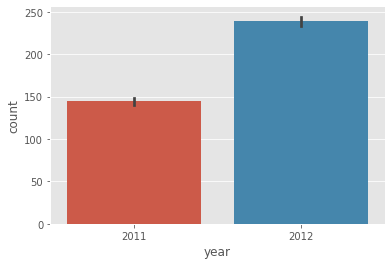

In [18]:
sns.barplot(data = train, x = 'year', y = 'count')

In [19]:
train['day'].value_counts()

1     575
9     575
5     575
17    575
15    574
19    574
16    574
7     574
8     574
4     574
13    574
14    574
3     573
2     573
12    573
10    572
6     572
11    568
18    563
Name: day, dtype: int64

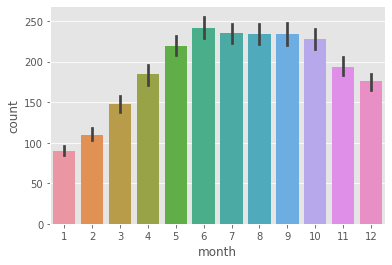

In [20]:
sns.barplot(data = train, x = 'month', y = 'count')

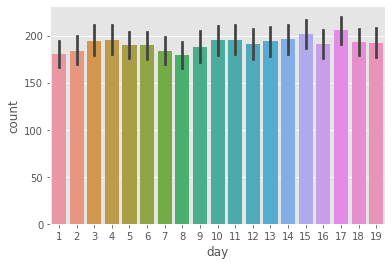

In [21]:
sns.barplot(data = train, x = 'day', y = 'count')

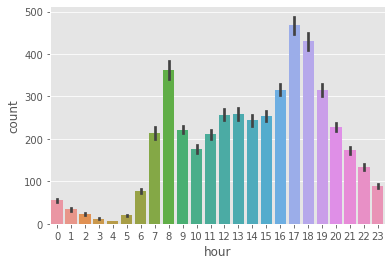

In [22]:
sns.barplot(data = train, x = 'hour', y = 'count')

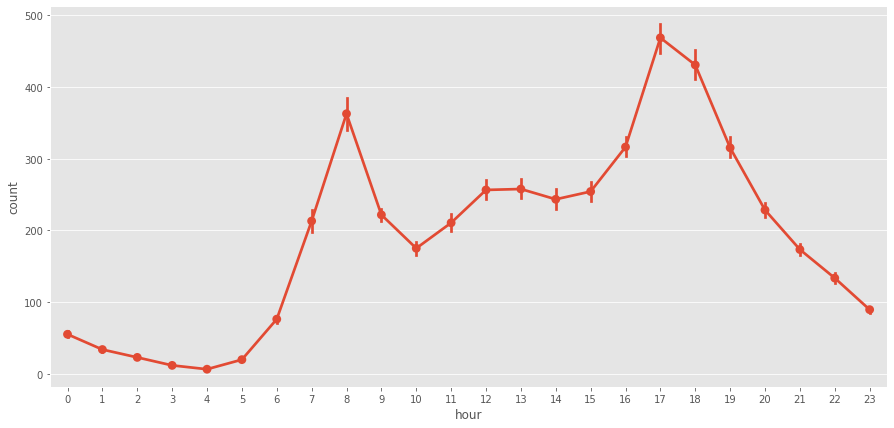

In [23]:
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'hour', y = 'count')

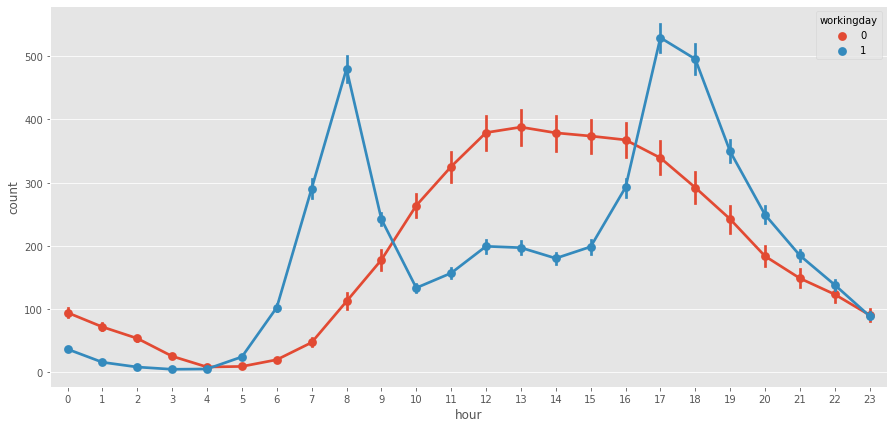

In [24]:
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday')

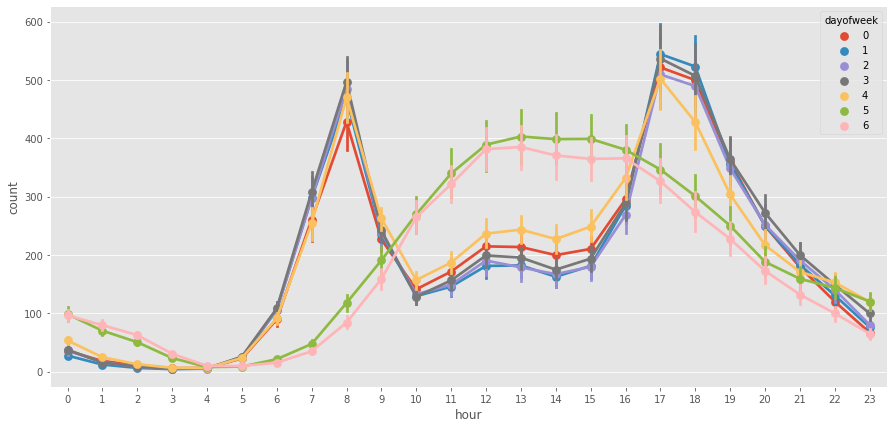

In [25]:
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek')

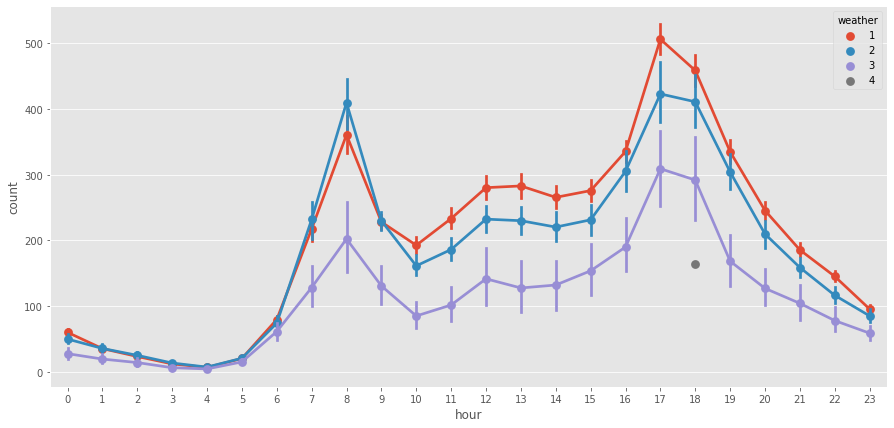

In [26]:
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather')

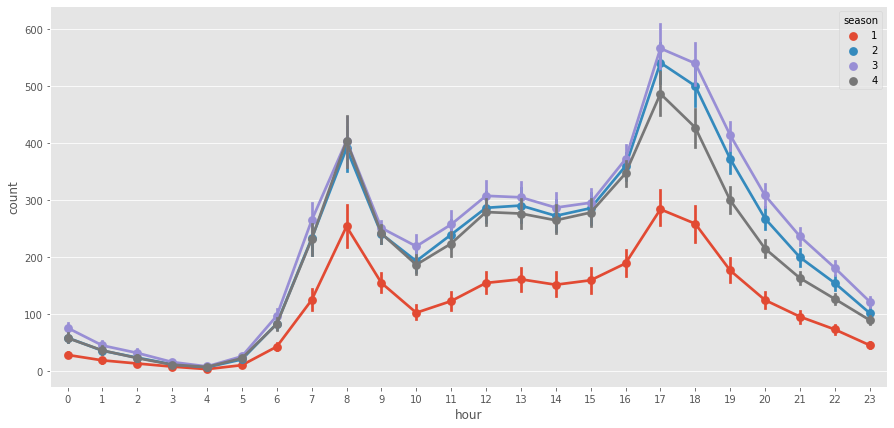

In [27]:
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'season')

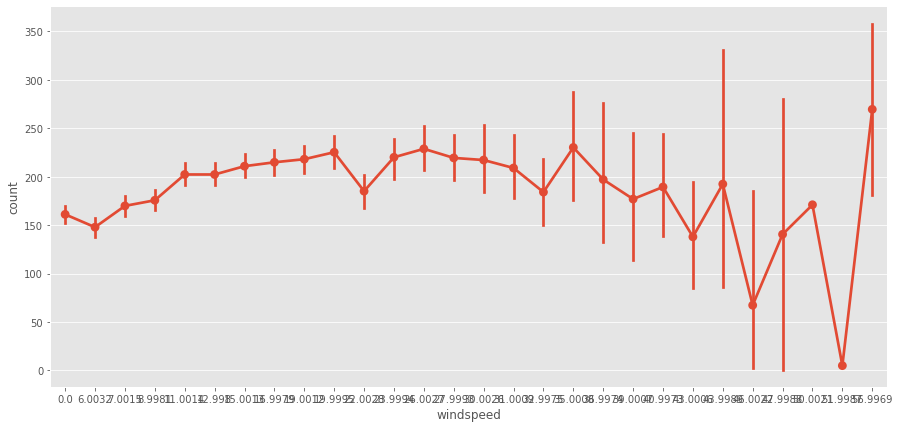

In [28]:
plt.figure(figsize = (15, 7))
sns.pointplot(data = train, x = 'windspeed', y = 'count')

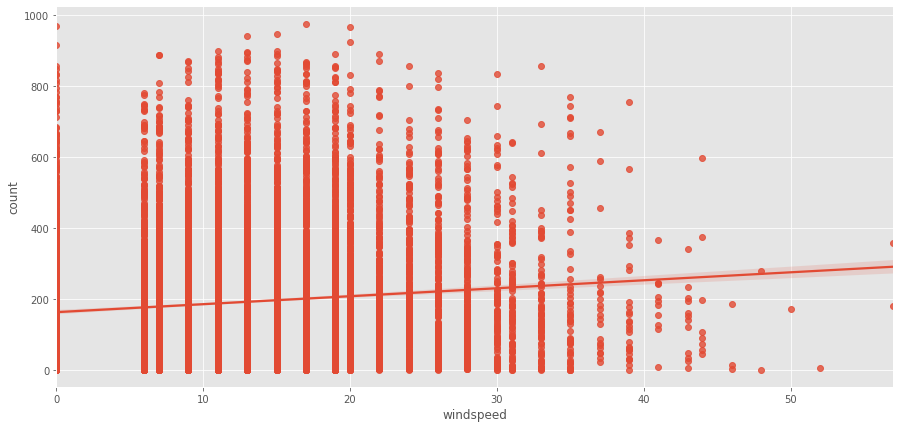

In [29]:
plt.figure(figsize = (15, 7))
sns.regplot(data = train, x = 'windspeed', y = 'count')

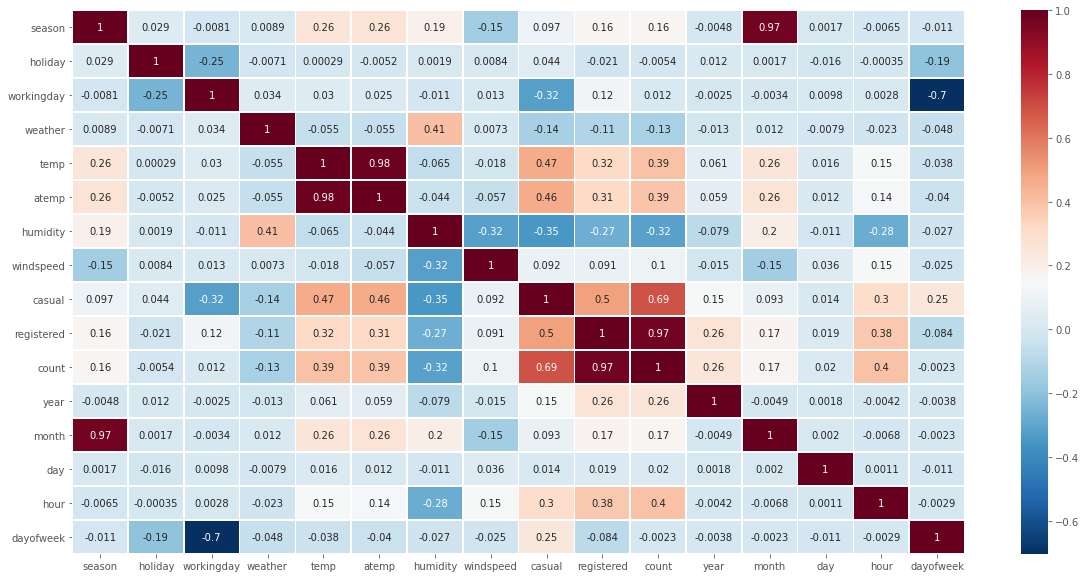

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(train.corr(), annot=True, cmap='RdBu_r', linewidths= 0.5)

In [31]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


In [32]:
train.corr()['temp'] # 다중공선성 검사 꼭하기(유의미한 결과는 10초과)

season        0.258689
holiday       0.000295
workingday    0.029966
weather      -0.055035
temp          1.000000
atemp         0.984948
humidity     -0.064949
windspeed    -0.017852
casual        0.467097
registered    0.318571
count         0.394454
year          0.061226
month         0.257589
day           0.015551
hour          0.145430
dayofweek    -0.038466
Name: temp, dtype: float64

# 아무 전처리 없이 예측

In [33]:
X = train.copy()
y = train['count']

In [34]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


In [35]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [36]:
X.pop('count')

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [37]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,2012,12,19,22,2


In [38]:
# 얘네 두개가 있으면 안됨
X.pop('registered')
X.pop('casual')

0         3
1         8
2         5
3         3
4         0
         ..
10881     7
10882    10
10883     4
10884    12
10885     4
Name: casual, Length: 10886, dtype: int64

In [39]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22,2


In [40]:
X.pop('day') # day는 지우는 이유가 train 파일에는 1~19일 밖에 없고 나머지 20~말일까지는 test에 있음 즉, 1~19로만 학습을 하면 20~말일은 제대로 못함

0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: day, Length: 10886, dtype: int64

In [41]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,22,2


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size = 0.2, random_state = 156)

In [43]:
from sklearn.linear_model import LinearRegression
lModel = LinearRegression()

In [44]:
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
pred = lModel.predict(X_train)

In [46]:
lModel.score(X_train, y_train) # R_square

0.3808472999618411

In [47]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [48]:
mean_squared_error(y_train, pred)**0.5

143.00375924493244